In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings 
warnings.filterwarnings("ignore")

In [2]:
churn_data = pd.read_csv("churn_data.csv")
customer = pd.read_csv('customer_data.csv')
internet = pd.read_csv ('internet_data.csv')

In [3]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_data.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   MultipleLines     7043 non-null   object
 2   InternetService   7043 non-null   object
 3   OnlineSecurity    7043 non-null   object
 4   OnlineBackup      7043 non-null   object
 5   DeviceProtection  7043 non-null   object
 6   TechSupport       7043 non-null   object
 7   StreamingTV       7043 non-null   object
 8   StreamingMovies   7043 non-null   object
dtypes: object(9)
memory usage: 495.3+ KB


In [8]:
# Merge the datasets
merged_dataset = pd.merge(churn_data, customer, on='customerID')
df = pd.merge(merged_dataset, internet, on='customerID')
df

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,...,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [10]:
df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [11]:
# identifying duplicate data

duplicate_data = df[df.duplicated()]
duplicate_data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


In [12]:
#data missing in total charges
df1= pd.to_numeric(df['TotalCharges'],errors=  ('coerce'))
df1.isna().sum()

11

In [13]:
empty_rows = df1[df1.isna()]
empty_rows

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [14]:
#####      dropping rest of the rows from the table

df2 = df.drop([488,753,936, 1082, 1340, 3331, 3826,4380,5218,6670,6754])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   tenure            7032 non-null   int64  
 2   PhoneService      7032 non-null   object 
 3   Contract          7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   object 
 8   Churn             7032 non-null   object 
 9   gender            7032 non-null   object 
 10  SeniorCitizen     7032 non-null   int64  
 11  Partner           7032 non-null   object 
 12  Dependents        7032 non-null   object 
 13  MultipleLines     7032 non-null   object 
 14  InternetService   7032 non-null   object 
 15  OnlineSecurity    7032 non-null   object 
 16  OnlineBackup      7032 non-null   object 


In [15]:
df2['TotalCharges'] = df2['TotalCharges'].astype('float')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   tenure            7032 non-null   int64  
 2   PhoneService      7032 non-null   object 
 3   Contract          7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7032 non-null   object 
 9   gender            7032 non-null   object 
 10  SeniorCitizen     7032 non-null   int64  
 11  Partner           7032 non-null   object 
 12  Dependents        7032 non-null   object 
 13  MultipleLines     7032 non-null   object 
 14  InternetService   7032 non-null   object 
 15  OnlineSecurity    7032 non-null   object 
 16  OnlineBackup      7032 non-null   object 


In [16]:
columns = ['Churn', 'gender','SeniorCitizen','Partner','PaymentMethod','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in columns:
    unique_values = df2[column].unique()
    print(f"{column}': {unique_values}")

Churn': ['No' 'Yes']
gender': ['Female' 'Male']
SeniorCitizen': [0 1]
Partner': ['Yes' 'No']
PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Dependents': ['No' 'Yes']
MultipleLines': ['No phone service' 'No' 'Yes']
InternetService': ['DSL' 'Fiber optic' 'No']
OnlineSecurity': ['No' 'Yes' 'No internet service']
OnlineBackup': ['Yes' 'No' 'No internet service']
DeviceProtection': ['No' 'Yes' 'No internet service']
TechSupport': ['No' 'Yes' 'No internet service']
StreamingTV': ['No' 'Yes' 'No internet service']
StreamingMovies': ['No' 'Yes' 'No internet service']


In [17]:
for column in columns:
    print(f'{column}\n', df2[column].value_counts(),'\n')

Churn
 No     5163
Yes    1869
Name: Churn, dtype: int64 

gender
 Male      3549
Female    3483
Name: gender, dtype: int64 

SeniorCitizen
 0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

Partner
 No     3639
Yes    3393
Name: Partner, dtype: int64 

PaymentMethod
 Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64 

Dependents
 No     4933
Yes    2099
Name: Dependents, dtype: int64 

MultipleLines
 No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

InternetService
 Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

OnlineSecurity
 No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

OnlineBackup
 No                     3087
Yes                    2425
No internet service    1520
Name: On

from the above values, it can be concluded that if internet service is no, then there is no internet service for 'OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', which is 'no' 

In [18]:
abc = df2.loc [df2['InternetService'] == 'No']
abc

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
11,7469-LKBCI,16,Yes,Two year,No,Credit card (automatic),18.95,326.80,No,Male,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
16,8191-XWSZG,52,Yes,One year,No,Mailed check,20.65,1022.95,No,Female,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
21,1680-VDCWW,12,Yes,One year,No,Bank transfer (automatic),19.80,202.25,No,Male,...,Yes,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
22,1066-JKSGK,1,Yes,Month-to-month,No,Mailed check,20.15,20.15,Yes,Male,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
33,7310-EGVHZ,1,Yes,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No,Male,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,51,Yes,Two year,No,Bank transfer (automatic),20.65,1020.75,No,Female,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7019,9710-NJERN,39,Yes,Two year,No,Mailed check,20.15,826.00,No,Female,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7020,9837-FWLCH,12,Yes,Month-to-month,Yes,Electronic check,19.20,239.00,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7030,0871-OPBXW,2,Yes,Month-to-month,Yes,Mailed check,20.05,39.25,No,Female,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [19]:
column_abc = ['OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in column_abc:
    print (f'{column}\n', abc[column].value_counts() )

OnlineSecurity
 No internet service    1520
Name: OnlineSecurity, dtype: int64
OnlineBackup
 No internet service    1520
Name: OnlineBackup, dtype: int64
DeviceProtection
 No internet service    1520
Name: DeviceProtection, dtype: int64
TechSupport
 No internet service    1520
Name: TechSupport, dtype: int64
StreamingTV
 No internet service    1520
Name: StreamingTV, dtype: int64
StreamingMovies
 No internet service    1520
Name: StreamingMovies, dtype: int64


from the above infernces it can be concluded that if the value in the column No internet service is no then its no internet service in rest of the columns

In [20]:
df2['Contract'] = df2['Contract'].replace({"Month-to-month" : 0 , 'One year': 1, 'Two year': 2})
df2['PaperlessBilling'] = df2['PaperlessBilling'].replace({"Yes" : 1, 'No':0})
df2['PaymentMethod'] = df2['PaymentMethod'].replace({"Electronic check" : 0, "Mailed check":1, "Bank transfer (automatic)":2,'Credit card (automatic)':3})
df2['Churn'] = df2['Churn'].replace({"Yes" : 1, 'No':0})
df2['gender'] = df2['gender'].replace({"Male" : 1, 'Female':0})
df2['Partner'] = df2['Partner'].replace({"Yes" : 1, 'No':0})
df2['Dependents'] = df2['Dependents'].replace({"Yes" : 1, 'No':0})
df2['MultipleLines'] = df2['MultipleLines'].replace({"Yes" : 1, 'No':0, "No phone service":0})
df2['InternetService'] = df2['InternetService'].replace({"DSL" : 1, 'Fiber optic':2, 'No':0})
df2['OnlineSecurity'] = df2['OnlineSecurity'].replace({"Yes" : 1, 'No':0,'No internet service' : 0})
df2['OnlineBackup'] = df2['OnlineBackup'].replace({"Yes" : 1, 'No':0,'No internet service' : 0})
df2['DeviceProtection'] = df2['DeviceProtection'].replace({"Yes" : 1, 'No':0, 'No internet service' : 0})
df2['TechSupport'] = df2['TechSupport'].replace({"Yes" : 1, 'No':0,'No internet service' : 0})
df2['StreamingTV'] = df2['StreamingTV'].replace({"Yes" : 1, 'No':0,"Yes" : 1, 'No':0,'No internet service' : 0})
df2['StreamingMovies'] = df2['StreamingMovies'].replace({"Yes" : 1, 'No':0,'No internet service' : 0})

In [21]:
df2.drop(['customerID','PhoneService'], axis=1, inplace=True)
df2.head()

,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,1,0,29.85,29.85,0,0,0,1,0,0,1,0,1,0,0,0,0
1,34,1,0,1,56.95,1889.50,0,1,0,0,0,0,1,1,0,1,0,0,0
2,2,0,1,1,53.85,108.15,1,1,0,0,0,0,1,1,1,0,0,0,0
3,45,1,0,2,42.30,1840.75,0,1,0,0,0,0,1,1,0,1,1,0,0
4,2,0,1,0,70.70,151.65,1,0,0,0,0,0,2,0,0,0,0,0,0


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7032 non-null   int64  
 1   Contract          7032 non-null   int64  
 2   PaperlessBilling  7032 non-null   int64  
 3   PaymentMethod     7032 non-null   int64  
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   Churn             7032 non-null   int64  
 7   gender            7032 non-null   int64  
 8   SeniorCitizen     7032 non-null   int64  
 9   Partner           7032 non-null   int64  
 10  Dependents        7032 non-null   int64  
 11  MultipleLines     7032 non-null   int64  
 12  InternetService   7032 non-null   int64  
 13  OnlineSecurity    7032 non-null   int64  
 14  OnlineBackup      7032 non-null   int64  
 15  DeviceProtection  7032 non-null   int64  
 16  TechSupport       7032 non-null   int64  


it can be concluded from the above that the phone service is 'No' is same as Mulipleline "No phone servise", dropping phone service

In [23]:
#Visualization

In [24]:
corr = df2.corr()
corr

,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
tenure,1.000000,0.676734,0.004823,0.340939,0.246862,0.825880,-0.354049,0.005285,0.015683,0.381912,0.163386,0.332399,0.031272,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402
Contract,0.676734,1.000000,-0.175475,0.359487,-0.072739,0.450306,-0.396150,0.000095,-0.141820,0.294094,0.240556,0.107529,-0.288855,0.245660,0.155262,0.219648,0.293967,0.104178,0.109136
PaperlessBilling,0.004823,-0.175475,1.000000,-0.101790,0.351930,0.157830,0.191454,-0.011902,0.156258,-0.013957,-0.110131,0.163746,0.377644,-0.004051,0.127056,0.104079,0.037536,0.224241,0.211583
PaymentMethod,0.340939,0.359487,-0.101790,1.000000,-0.074640,0.222694,-0.262918,-0.004928,-0.093712,0.133280,0.124002,0.036009,-0.178655,0.162848,0.096246,0.110953,0.167189,-0.014230,-0.004261
MonthlyCharges,0.246862,-0.072739,0.351930,-0.074640,1.000000,0.651065,0.192858,-0.013779,0.219874,0.097825,-0.112343,0.490912,0.905389,0.296447,0.441529,0.482607,0.338301,0.629668,0.627235
TotalCharges,0.825880,0.450306,0.157830,0.222694,0.651065,1.000000,-0.199484,0.000048,0.102411,0.319072,0.064653,0.469042,0.428212,0.412619,0.510100,0.522881,0.432868,0.515709,0.519867
Churn,-0.354049,-0.396150,0.191454,-0.262918,0.192858,-0.199484,1.000000,-0.008545,0.150541,-0.149982,-0.163128,0.040033,0.316350,-0.171270,-0.082307,-0.066193,-0.164716,0.063254,0.060860
gender,0.005285,0.000095,-0.011902,-0.004928,-0.013779,0.000048,-0.008545,1.000000,-0.001819,-0.001379,0.010349,-0.008883,-0.009643,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105
SeniorCitizen,0.015683,-0.141820,0.156258,-0.093712,0.219874,0.102411,0.150541,-0.001819,1.000000,0.016957,-0.210550,0.142996,0.259030,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842
Partner,0.381912,0.294094,-0.013957,0.133280,0.097825,0.319072,-0.149982,-0.001379,0.016957,1.000000,0.452269,0.142561,0.000938,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108


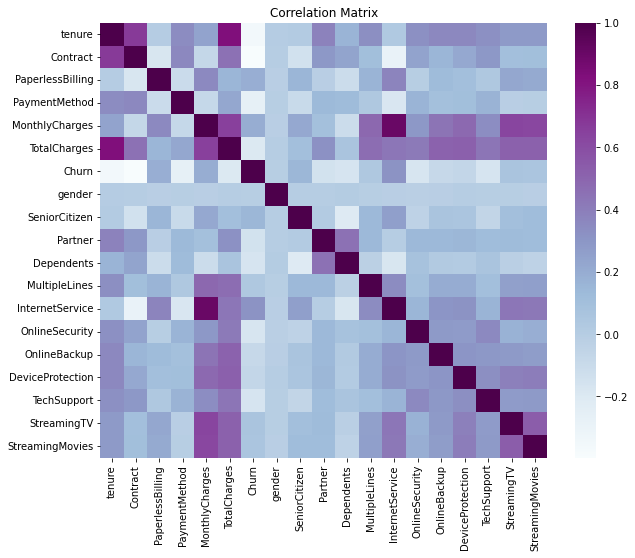

In [25]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()

0    0.734215
1    0.265785
Name: Churn, dtype: float64


Text(0, 0.5, 'proportion of observations')

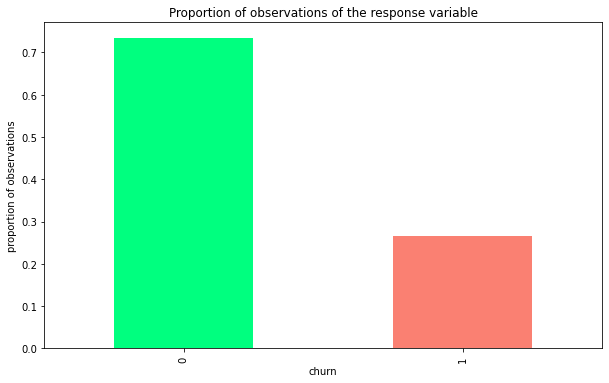

In [26]:
# Plotting the bar graph

prop_response = df2['Churn'].value_counts(normalize=True)
print(prop_response)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
prop_response.plot(kind='bar', ax=ax, color=['springgreen','salmon'])
ax.set_title('Proportion of observations of the response variable')
ax.set_xlabel('churn')
ax.set_ylabel('proportion of observations')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

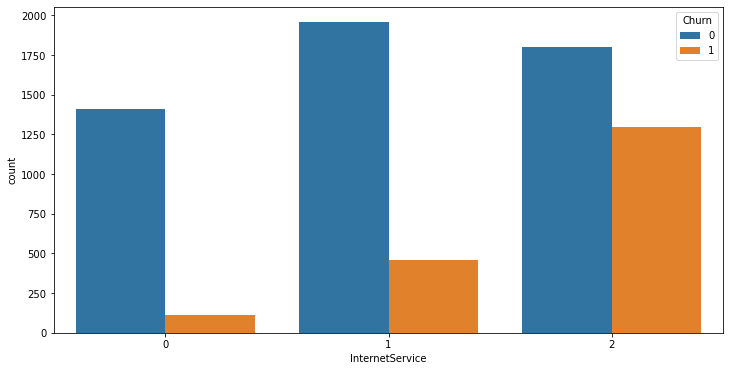

In [27]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'InternetService', hue = 'Churn', data = df2)

<AxesSubplot:xlabel='Contract', ylabel='count'>

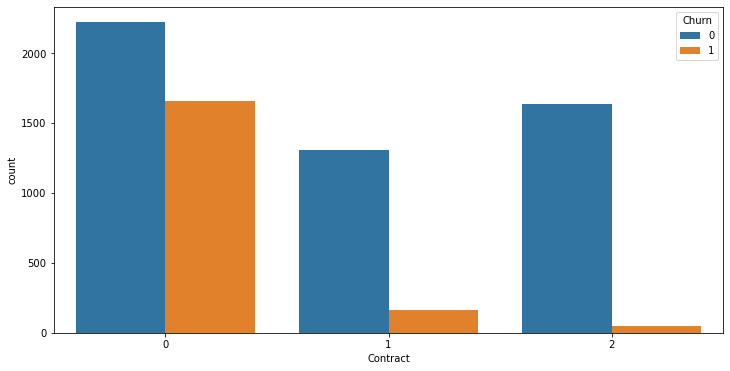

In [28]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Contract', hue = 'Churn', data = df2)

<AxesSubplot:xlabel='gender', ylabel='count'>

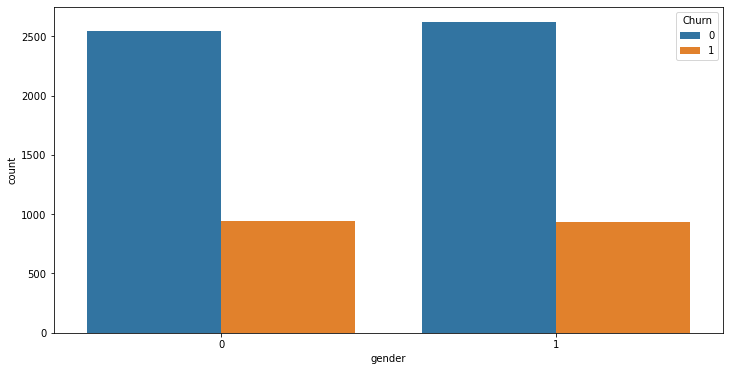

In [29]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'gender', hue = 'Churn', data = df2)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

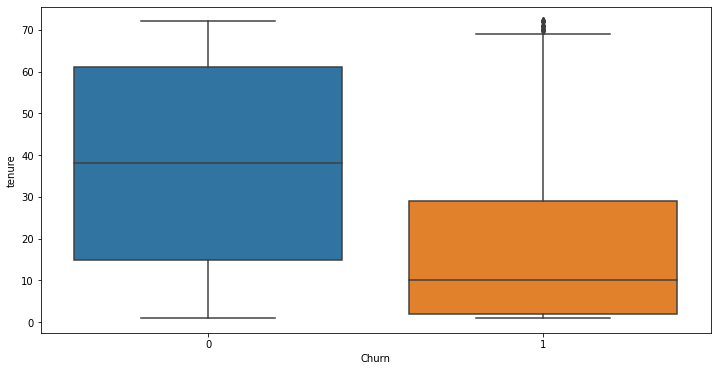

In [30]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Churn', y ='tenure', data = df2)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

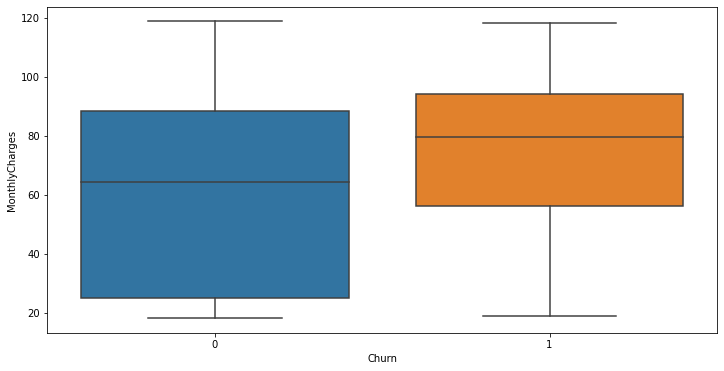

In [31]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Churn', y ='MonthlyCharges', data = df2)

Text(0.5, 1.0, 'Contract Type')

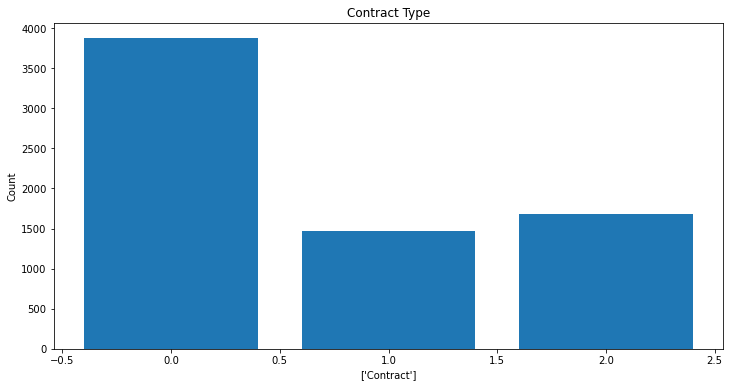

In [32]:
plt.figure(figsize = (12,6))
plt.bar( (df2['Contract'].value_counts()).index, (df2['Contract'].value_counts()).values)
plt.xlabel(['Contract'])
plt.ylabel('Count')
plt.title('Contract Type')

In [33]:
pd.set_option('display.max_columns', None)
df2.head()

,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,1,0,29.85,29.85,0,0,0,1,0,0,1,0,1,0,0,0,0
1,34,1,0,1,56.95,1889.50,0,1,0,0,0,0,1,1,0,1,0,0,0
2,2,0,1,1,53.85,108.15,1,1,0,0,0,0,1,1,1,0,0,0,0
3,45,1,0,2,42.30,1840.75,0,1,0,0,0,0,1,1,0,1,1,0,0
4,2,0,1,0,70.70,151.65,1,0,0,0,0,0,2,0,0,0,0,0,0


In [34]:
## normalizing the rest of the data
from sklearn.preprocessing import MinMaxScaler
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df2[columns] = scaler.fit_transform(df2[columns])
df2.head()

,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0.000000,0,1,0,0.115423,0.001275,0,0,0,1,0,0,1,0,1,0,0,0,0
1,0.464789,1,0,1,0.385075,0.215867,0,1,0,0,0,0,1,1,0,1,0,0,0
2,0.014085,0,1,1,0.354229,0.010310,1,1,0,0,0,0,1,1,1,0,0,0,0
3,0.619718,1,0,2,0.239303,0.210241,0,1,0,0,0,0,1,1,0,1,1,0,0
4,0.014085,0,1,0,0.521891,0.015330,1,0,0,0,0,0,2,0,0,0,0,0,0


In [35]:
x = df2.drop('Churn', axis=1)
y = df2['Churn']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33 , random_state=1)

In [36]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4711 entries, 5929 to 5165
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            4711 non-null   float64
 1   Contract          4711 non-null   int64  
 2   PaperlessBilling  4711 non-null   int64  
 3   PaymentMethod     4711 non-null   int64  
 4   MonthlyCharges    4711 non-null   float64
 5   TotalCharges      4711 non-null   float64
 6   gender            4711 non-null   int64  
 7   SeniorCitizen     4711 non-null   int64  
 8   Partner           4711 non-null   int64  
 9   Dependents        4711 non-null   int64  
 10  MultipleLines     4711 non-null   int64  
 11  InternetService   4711 non-null   int64  
 12  OnlineSecurity    4711 non-null   int64  
 13  OnlineBackup      4711 non-null   int64  
 14  DeviceProtection  4711 non-null   int64  
 15  TechSupport       4711 non-null   int64  
 16  StreamingTV       4711 non-null   int64

In [37]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 4711 entries, 5929 to 5165
Series name: Churn
Non-Null Count  Dtype
--------------  -----
4711 non-null   int64
dtypes: int64(1)
memory usage: 73.6 KB


In [38]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 2321 entries, 1778 to 16
Series name: Churn
Non-Null Count  Dtype
--------------  -----
2321 non-null   int64
dtypes: int64(1)
memory usage: 36.3 KB


1. Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

models_logreg = []

# Define parameters
C_values = [0.1, 1, 5, 10, 20, 30]

# Create and train the Logistic Regression models
for C in C_values:
    logreg = LogisticRegression(C=C, random_state=1)
    logreg.fit(x_train, y_train)
    models_logreg.append(logreg)

# Generate classification report for each model
results = []
for i, logreg in enumerate(models_logreg):
    y_pred = logreg.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    recall = report['macro avg']['recall']
    results.append({'Model': f'Model {i+1}', 'Accuracy': accuracy, 'Recall': recall})

# Create DataFrame from results
df_logreg = pd.DataFrame(results)


In [41]:
# Sort DataFrame by Accuracy in descending order
logreg_accuracy = df_logreg.sort_values(by=['Accuracy'], ascending=False).iloc[0]
print("Top Accuracy:")
print(logreg_accuracy, )

# Sort DataFrame by Recall in descending order
logreg_recall = df_logreg.sort_values(by=['Recall'], ascending=False).iloc[0]
print("\n Top Recall:")
print(logreg_recall)


Top Accuracy:
Model        Model 1
Accuracy     0.80224
Recall      0.714118
Name: 0, dtype: object

 Top Recall:
Model        Model 2
Accuracy     0.80181
Recall      0.721361
Name: 1, dtype: object


In [43]:
# Model 1 gives best accuracy and recall
model_index = 1
Logreg_best_model = models_logreg[model_index]
Logreg_best_model

LogisticRegression(C=1, random_state=1)

In [44]:
#verification
Log = LogisticRegression(C=1, random_state=1)
Log.fit(x_train, y_train)
y_pred = Log.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1718
           1       0.64      0.55      0.59       603

    accuracy                           0.80      2321
   macro avg       0.74      0.72      0.73      2321
weighted avg       0.79      0.80      0.80      2321



2. Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

models_DT = []

# Define parameters
max_depths = [3, 4, 5, 6, 7]
max_features = ['sqrt', 'log2', None]
min_samples_leafs = [1, 2, 3, 5, 10]
max_leaf_nodes = [5, 10, 15, 20]

# Create and train the decision tree models
for max_depth in max_depths:
    for max_feature in max_features:
        for min_samples_leaf in min_samples_leafs:
            for max_leaf_node in max_leaf_nodes:
                DT = DecisionTreeClassifier(criterion='gini', max_depth=max_depth,
                                               max_features=max_feature, min_samples_leaf=min_samples_leaf,
                                               max_leaf_nodes=max_leaf_node, random_state=1)
                DT.fit(x_train, y_train)
                models_DT.append(DT)

# Generate classification report for each model
results = []
for i, DT in enumerate(models_DT):
    y_pred = DT.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    recall = report['macro avg']['recall']
    results.append({'Model': f'Model {i+1}', 'Accuracy': accuracy, 'Recall': recall})

# Create DataFrame from results
df_DT = pd.DataFrame(results)



In [46]:
# Sort DataFrame by Accuracy in descending order
DT_accuracy = df_DT.sort_values(by=['Accuracy'], ascending=False).iloc[0]
print("Sorted by Accuracy:")
print(DT_accuracy)

# Sort DataFrame by Recall in descending order
DT_recall = df_DT.sort_values(by=['Recall'], ascending=False).iloc[0]
print("Sorted by Recall:")
print(DT_recall)

Sorted by Accuracy:
Model       Model 225
Accuracy     0.798794
Recall       0.669814
Name: 224, dtype: object
Sorted by Recall:
Model       Model 180
Accuracy     0.794485
Recall       0.738477
Name: 179, dtype: object


In [77]:
#model 74 gives best accuracy and recall
model_index =179
DT_best_model = models_DT[model_index]
DT_best_model

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, min_samples_leaf=10,
                       random_state=1)

In [78]:
# Verfication

DT = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, min_samples_leaf=10,
                       random_state=1)
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1718
           1       0.60      0.62      0.61       603

    accuracy                           0.79      2321
   macro avg       0.73      0.74      0.74      2321
weighted avg       0.80      0.79      0.80      2321



3. Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = []

# Define parameters
n_estimators = [100, 500, 1000, 10000]
max_depths = [3, 4, 5, 6, 7,9]

# Create and train the Random Forest models
for n_estimator in n_estimators:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs:
            RFC = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth,random_state=1)
            RFC.fit(x_train, y_train)
            RFC_model.append(RFC)

# Generate classification report for each model
results = []
for i, RFC in enumerate(RFC_model):
    y_pred = RFC.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    recall = report['macro avg']['recall']
    results.append({'Model': f'Model {i+1}', 'Accuracy': accuracy, 'Recall': recall})

# Create DataFrame from results
df_RFC = pd.DataFrame(results)



In [50]:
# Sort DataFrame by Accuracy in descending order
RFC_accuracy = df_RFC.sort_values(by=['Accuracy'], ascending=False).iloc[0]
print("Sorted by Accuracy:")
print(RFC_accuracy)

# Sort DataFrame by Recall in descending order
RFC_recall = df_RFC.sort_values(by=['Recall'], ascending=False).iloc[0]
print("Sorted by Recall:")
print(RFC_recall)

Sorted by Accuracy:
Model       Model 75
Accuracy    0.805256
Recall      0.695705
Name: 74, dtype: object
Sorted by Recall:
Model       Model 56
Accuracy    0.797501
Recall      0.703382
Name: 55, dtype: object


In [79]:
model_index = 55
RFC_best_model = RFC_model[model_index]
RFC_best_model

RandomForestClassifier(max_depth=9, n_estimators=500, random_state=1)

4. Ada Boost

In [52]:
from sklearn.ensemble import AdaBoostClassifier


AdaBoost_model = []

# Define parameters
n_estimators = [50, 100, 200, 500, 1000, 5000]
learning_rates = [0.1,0.33, 0.5, 1.0]

# Create and train the AdaBoost models
for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        AdaBoost = AdaBoostClassifier(n_estimators=n_estimator, learning_rate=learning_rate, random_state=1)
        AdaBoost.fit(x_train, y_train)
        AdaBoost_model.append(AdaBoost)

# Generate classification report for each model
results = []
for i, AdaBoost in enumerate(AdaBoost_model):
    y_pred = AdaBoost.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    recall = report['macro avg']['recall']
    results.append({'Model': f'Model {i+1}', 'Accuracy': accuracy, 'Recall': recall})

# Create DataFrame from results
df_AdaBoost = pd.DataFrame(results)

In [53]:
# Sort DataFrame by Accuracy in descending order and get top result
AdaBoost_accuracy = df_AdaBoost.sort_values(by='Accuracy', ascending=False).iloc[0]
print("Top Accuracy (AdaBoost Classifier):")
print(AdaBoost_accuracy)

# Sort DataFrame by Recall in descending order and get top result
AdaBoost_recall = df_AdaBoost.sort_values(by='Recall', ascending=False).iloc[0]
print("Top Recall (AdaBoost Classifier):")
print(AdaBoost_recall)

Top Accuracy (AdaBoost Classifier):
Model        Model 7
Accuracy     0.80224
Recall      0.715732
Name: 6, dtype: object
Top Recall (AdaBoost Classifier):
Model        Model 7
Accuracy     0.80224
Recall      0.715732
Name: 6, dtype: object


In [80]:
model_index = 6
Ada_best_model = AdaBoost_model[model_index]
Ada_best_model

AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=1)

5. Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier


GB_model = []

# Define parameters
n_estimators = [100, 500, 1000, 5000, 10000]
learning_rates = [0.1, 0.33, 0.5, 1.0]
max_depths = [3, 4, 5, 6, 7, 9]

# Create and train the Gradient Boosting models
for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        for max_depth in max_depths:
            GB = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate=learning_rate, max_depth=max_depth, random_state=1)
            GB.fit(x_train, y_train)
            GB_model.append(GB)

# Generate classification report for each model
results = []
for i, GB in enumerate(GB_model):
    y_pred = GB.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    recall = report['macro avg']['recall']
    results.append({'Model': f'Model {i+1}', 'Accuracy': accuracy, 'Recall': recall})

# Create DataFrame from results
df_GB = pd.DataFrame(results)

In [56]:
# Sort DataFrame by Accuracy in descending order and get top result
GB_accuracy = df_GB.sort_values(by='Accuracy', ascending=False).iloc[0]
print("Top Accuracy (Gradient Boosting Classifier):")
print(GB_accuracy)

# Sort DataFrame by Recall in descending order and get top result
GB_recall = df_GB.sort_values(by='Recall', ascending=False).iloc[0]
print("Top Recall (Gradient Boosting Classifier):")
print(GB_recall)

Top Accuracy (Gradient Boosting Classifier):
Model        Model 1
Accuracy    0.796639
Recall      0.704414
Name: 0, dtype: object
Top Recall (Gradient Boosting Classifier):
Model        Model 2
Accuracy    0.794916
Recall      0.705403
Name: 1, dtype: object


In [81]:
model_index = 1
GB_best_model = GB_model[model_index]
GB_best_model

GradientBoostingClassifier(max_depth=4, random_state=1)

6. XG Boost

In [58]:
from xgboost import XGBClassifier

XGB_model = []

# Define parameters
n_estimators = [100, 500, 1000, 5000, 10000]
max_depths = [3, 4, 5, 6, 7, 9]

# Create and train the XGBoost models
for n_estimator in n_estimators:
    for max_depth in max_depths:
        XGB = XGBClassifier(n_estimators=n_estimator, max_depth=max_depth, random_state=1)
        XGB.fit(x_train, y_train)
        XGB_model.append(XGB)

# Generate classification report for each model
results = []
for i, XGB in enumerate(XGB_model):
    y_pred = XGB.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    recall = report['macro avg']['recall']
    results.append({'Model': f'Model {i+1}', 'Accuracy': accuracy, 'Recall': recall})

# Create DataFrame from results
df_XGB = pd.DataFrame(results)

In [59]:
# Sort DataFrame by Accuracy in descending order and get top result
XGB_accuracy = df_XGB.sort_values(by='Accuracy', ascending=False).iloc[0]
print("Top Accuracy (XGBoost Classifier):")
print(XGB_accuracy)

# Sort DataFrame by Recall in descending order and get top result
XGB_recall = df_XGB.sort_values(by='Recall', ascending=False).iloc[0]
print("Top Recall (XGBoost Classifier):")
print(XGB_recall)

Top Accuracy (XGBoost Classifier):
Model        Model 1
Accuracy    0.794054
Recall      0.703745
Name: 0, dtype: object
Top Recall (XGBoost Classifier):
Model        Model 2
Accuracy    0.794054
Recall      0.705359
Name: 1, dtype: object


In [82]:
model_index = 1
XGB_best_model = XGB_model[model_index]
XGB_best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

7. KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier


KNN_model = []

# Define parameters
n_neighbors = [3, 5, 7, 10]
weights = ['uniform', 'distance']

# Create and train the KNN models
for n_neighbor in n_neighbors:
    for weight in weights:
        KNN = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight)
        KNN.fit(x_train, y_train)
        KNN_model.append(KNN)

# Generate classification report for each model
results = []
for i, KNN in enumerate(KNN_model):
    y_pred = KNN.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    recall = report['macro avg']['recall']
    results.append({'Model': f'Model {i+1}', 'Accuracy': accuracy, 'Recall': recall})

# Create DataFrame from results
df_KNN = pd.DataFrame(results)

In [62]:
# Sort DataFrame by Accuracy in descending order and get top result
KNN_accuracy = df_KNN.sort_values(by='Accuracy', ascending=False).iloc[0]
print("Top Accuracy (K-Nearest Neighbors Classifier):")
print(KNN_accuracy)

# Sort DataFrame by Recall in descending order and get top result
KNN_recall = df_KNN.sort_values(by='Recall', ascending=False).iloc[0]
print("Top Recall (K-Nearest Neighbors Classifier):")
print(KNN_recall)

Top Accuracy (K-Nearest Neighbors Classifier):
Model        Model 7
Accuracy    0.772081
Recall      0.667914
Name: 6, dtype: object
Top Recall (K-Nearest Neighbors Classifier):
Model        Model 5
Accuracy    0.763895
Recall      0.684448
Name: 4, dtype: object


In [63]:
model_index = 4
KNN_best_model = KNN_model[model_index]
KNN_best_model

KNeighborsClassifier(n_neighbors=7)

8. SVM

In [64]:
from sklearn.svm import SVC

SVM_model = []

# Define parameters
C_values = [0.1, 1, 10, 100, 500, 1000]
kernels = ['linear', 'rbf']

# Create and train the SVM models
for C_value in C_values:
    for kernel in kernels:
        SVM = SVC(C=C_value, kernel=kernel, random_state=1)
        SVM.fit(x_train, y_train)
        SVM_model.append(SVM)

# Generate classification report for each model
results = []
for i, SVM in enumerate(SVM_model):
    y_pred = SVM.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    recall = report['macro avg']['recall']
    results.append({'Model': f'Model {i+1}', 'Accuracy': accuracy, 'Recall': recall})

# Create DataFrame from results
df_SVM = pd.DataFrame(results)

In [65]:
# Sort DataFrame by Accuracy in descending order and get top result
SVM_accuracy = df_SVM.sort_values(by='Accuracy', ascending=False).iloc[0]
print("Top Accuracy (Support Vector Machine Classifier):")
print(SVM_accuracy)

# Sort DataFrame by Recall in descending order and get top result
SVM_recall = df_SVM.sort_values(by='Recall', ascending=False).iloc[0]
print("Top Recall (Support Vector Machine Classifier):")
print(SVM_recall)

Top Accuracy (Support Vector Machine Classifier):
Model        Model 1
Accuracy    0.800948
Recall      0.719702
Name: 0, dtype: object
Top Recall (Support Vector Machine Classifier):
Model        Model 7
Accuracy    0.799655
Recall      0.726363
Name: 6, dtype: object


In [66]:
model_index = 6
SVM_best_model = SVM_model[model_index]
SVM_best_model

SVC(C=100, kernel='linear', random_state=1)

9. ANN

In [67]:
from sklearn.neural_network import MLPClassifier

ANN_model = []

# Define parameters
hidden_layer_sizes = [(100,), (100, 50), (200, 100, 50), (500, 200, 100, 50)]
activation_functions = ['relu', 'tanh', 'logistic']

# Create and train the ANN models
for hidden_layer_size in hidden_layer_sizes:
    for activation_function in activation_functions:
        ANN = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=activation_function, random_state=1)
        ANN.fit(x_train, y_train)
        ANN_model.append(ANN)

# Generate classification report for each model
results = []
for i, ANN in enumerate(ANN_model):
    y_pred = ANN.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    recall = report['macro avg']['recall']
    results.append({'Model': f'Model {i+1}', 'Accuracy': accuracy, 'Recall': recall})

# Create DataFrame from results
df_ANN = pd.DataFrame(results)

In [68]:
# Sort DataFrame by Accuracy in descending order and get top result
ANN_accuracy = df_ANN.sort_values(by='Accuracy', ascending=False).iloc[0]
print("Top Accuracy (Artificial Neural Network Classifier):")
print(ANN_accuracy)

# Sort DataFrame by Recall in descending order and get top result
ANN_recall = df_ANN.sort_values(by='Recall', ascending=False).iloc[0]
print("Top Recall (Artificial Neural Network Classifier):")
print(ANN_recall)

Top Accuracy (Artificial Neural Network Classifier):
Model        Model 3
Accuracy    0.806549
Recall      0.726177
Name: 2, dtype: object
Top Recall (Artificial Neural Network Classifier):
Model        Model 3
Accuracy    0.806549
Recall      0.726177
Name: 2, dtype: object


In [69]:
model_index = 2
ANN_best_model = ANN_model[model_index]
ANN_best_model

MLPClassifier(activation='logistic', random_state=1)

In [70]:
outputs = [
    ("Logistic Regression", logreg_accuracy["Accuracy"], logreg_accuracy["Recall"]),
    ("Decision Tree", DT_accuracy["Accuracy"], DT_accuracy["Recall"]),
    ("Random Forest", RFC_accuracy["Accuracy"], RFC_accuracy["Recall"]),
    ("AdaBoost Classifier", AdaBoost_accuracy["Accuracy"], AdaBoost_accuracy["Recall"]),
    ("Gradient Boosting Classifier", GB_accuracy["Accuracy"], GB_accuracy["Recall"]),
    ("XGBoost Classifier", XGB_accuracy["Accuracy"], XGB_accuracy["Recall"]),
    ("K-Nearest Neighbors Classifier", KNN_accuracy["Accuracy"], KNN_accuracy["Recall"]),
    ("Support Vector Machine Classifier", SVM_accuracy["Accuracy"], SVM_accuracy["Recall"]),
    ("Artificial Neural Network Classifier", ANN_accuracy["Accuracy"], ANN_accuracy["Recall"])
]

df_outputs = pd.DataFrame(outputs, columns=["Model", "Accuracy", "Recall"])

In [71]:
df_outputs

,Model,Accuracy,Recall
0,Logistic Regression,0.802240,0.714118
1,Decision Tree,0.798794,0.669814
2,Random Forest,0.805256,0.695705
3,AdaBoost Classifier,0.802240,0.715732
4,Gradient Boosting Classifier,0.796639,0.704414
5,XGBoost Classifier,0.794054,0.703745
6,K-Nearest Neighbors Classifier,0.772081,0.667914
7,Support Vector Machine Classifier,0.800948,0.719702
8,Artificial Neural Network Classifier,0.806549,0.726177


In [72]:
df_sorted_accuracy = df_outputs.sort_values(by='Accuracy', ascending=False)
df_sorted_accuracy

,Model,Accuracy,Recall
8,Artificial Neural Network Classifier,0.806549,0.726177
2,Random Forest,0.805256,0.695705
0,Logistic Regression,0.802240,0.714118
3,AdaBoost Classifier,0.802240,0.715732
7,Support Vector Machine Classifier,0.800948,0.719702
1,Decision Tree,0.798794,0.669814
4,Gradient Boosting Classifier,0.796639,0.704414
5,XGBoost Classifier,0.794054,0.703745
6,K-Nearest Neighbors Classifier,0.772081,0.667914


In [73]:
df_sorted_recall = df_outputs.sort_values(by='Recall', ascending=False)
df_sorted_recall

,Model,Accuracy,Recall
8,Artificial Neural Network Classifier,0.806549,0.726177
7,Support Vector Machine Classifier,0.800948,0.719702
3,AdaBoost Classifier,0.802240,0.715732
0,Logistic Regression,0.802240,0.714118
4,Gradient Boosting Classifier,0.796639,0.704414
5,XGBoost Classifier,0.794054,0.703745
2,Random Forest,0.805256,0.695705
1,Decision Tree,0.798794,0.669814
6,K-Nearest Neighbors Classifier,0.772081,0.667914


In [74]:
# ANN model gives the best accuracy and recall among all the datasets

In [75]:
# saving the model 
import pickle 
pickle_out = open("classifier9.pkl", mode = "wb") #opened for writing in binary mode
pickle.dump(ANN, pickle_out) 
pickle_out.close()

In [1]:
%%writefile app99.py
 
import pickle
import streamlit as st

# Loading the trained model
pickle_in = open('classifier9.pkl', 'rb') 
classifier = pickle.load(pickle_in)

@st.cache_data 
def prediction(tenure, Contract, PaperlessBilling, MonthlyCharges, gender, SeniorCitizen, Partner, Dependents,
               PaymentMethod, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,
               StreamingTV, StreamingMovies, MultipleLines,TotalCharges):
    
    # Pre-processing user input
    if PaperlessBilling == "Yes":
        PaperlessBilling = 1
    else:
        PaperlessBilling = 0
    
    if gender == 'Male':
        gender = 1
    else:
        gender = 0
        
    if Contract == "Month-to-month":
        Contract = 0
    elif Contract == "One_year":
        Contract = 1
    else:
        Contract = 2
        
    if SeniorCitizen == 'Yes':
        SeniorCitizen = 1
    else:
        SeniorCitizen = 0
        
    if Partner == 'Yes':
        Partner = 1
    else:
        Partner = 0
        
    if Dependents == "Yes":
        Dependents = 1
    else:
        Dependents = 0
        
    if InternetService == 'DSL':
        InternetService = 1
    elif InternetService == 'Fiber optic':
        InternetService = 2
    else:
        InternetService = 0
        OnlineSecurity = 0
        OnlineBackup = 0
        DeviceProtection = 0
        TechSupport = 0
        StreamingTV = 0
        StreamingMovies = 0
        
    if OnlineSecurity == "Yes":
        OnlineSecurity = 1
    else:
        OnlineSecurity = 0
        
    if OnlineBackup == "Yes":
        OnlineBackup = 1
    else:
        OnlineBackup = 0
        
    if DeviceProtection == "Yes":
        DeviceProtection = 1
    else:
        DeviceProtection = 0
        
    if TechSupport == "Yes":
        TechSupport = 1
    else:
        TechSupport = 0
        
    if StreamingTV == "Yes":
        StreamingTV = 1
    else:
        StreamingTV = 0
        
    if StreamingMovies == "Yes":
        StreamingMovies = 1
    else:
        StreamingMovies = 0
    
    if PaymentMethod == "Electronic check":
        PaymentMethod = 0
    elif PaymentMethod == "Mailed check":
        PaymentMethod = 1
    elif PaymentMethod == "Bank transfer (automatic)":
        PaymentMethod = 2
    else:
        PaymentMethod = 3
        
    if MultipleLines == "No phone service":
        MultipleLines = 0
    elif MultipleLines == "No":
        MultipleLines = 1
    else:
        MultipleLines = 2
    
    prediction = classifier.predict([[tenure, Contract, MonthlyCharges, PaperlessBilling, gender, SeniorCitizen,
                                      Partner, Dependents, PaymentMethod, InternetService, OnlineSecurity,
                                      OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies,
                                      MultipleLines,TotalCharges]])
    
    if prediction == 0:
        pred = 'will not churn'
    else:
        pred = 'is likely to churn'

    return pred
        
        
def main():       
    # Front-end elements of the web page 
    st.title("Churn Prediction")
    st.markdown("This app predicts customer churn.")
    
    # User input fields
    tenure = st.sidebar.number_input("Tenure", min_value=0, max_value=100)
    Contract = st.sidebar.selectbox("Contract", ["Month-to-month", "One_year", "Two_year"])
    PaperlessBilling = st.sidebar.selectbox("Paperless Billing", ["Yes", "No"])
    PaymentMethod = st.sidebar.selectbox("Payment Method", ["Electronic check", "Mailed check",
                                                            "Bank transfer (automatic)", "Credit card (automatic)"])
    MonthlyCharges = st.sidebar.number_input("Monthly Charges",min_value=0, max_value=300)
    TotalCharges = st.sidebar.number_input("TotalCharges",min_value=0, max_value=10000)
    gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
    SeniorCitizen = st.sidebar.selectbox("Senior Citizen", ["Yes", "No"])
    Partner = st.sidebar.selectbox("Partner", ["Yes", "No"])
    Dependents = st.sidebar.selectbox("Dependents", ["Yes", "No"])
    MultipleLines = st.sidebar.selectbox("Multiple Lines", ["No phone service", "No - Single Line", "Yes"])

    InternetService = st.sidebar.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
    
    if InternetService == "No":
        OnlineSecurity = 0
        OnlineBackup = 0
        DeviceProtection = 0
        TechSupport = 0
        StreamingTV = 0
        StreamingMovies = 0
    else:
        OnlineSecurity = st.sidebar.selectbox("Online Security", ["Yes", "No"])
        OnlineBackup = st.sidebar.selectbox("Online Backup", ["Yes", "No"])
        DeviceProtection = st.sidebar.selectbox("Device Protection", ["Yes", "No"])
        TechSupport = st.sidebar.selectbox("Tech Support", ["Yes", "No"])
        StreamingTV = st.sidebar.selectbox("Streaming TV", ["Yes", "No"])
        StreamingMovies = st.sidebar.selectbox("Streaming Movies", ["Yes", "No"])
    
    
    result = ""
      
    if st.button("Predict"): 
        result = prediction(tenure, Contract, PaperlessBilling, MonthlyCharges, gender, SeniorCitizen, Partner,
                            Dependents, PaymentMethod, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection,
                            TechSupport, StreamingTV, StreamingMovies, MultipleLines,TotalCharges)
        st.success('Customer {}'.format(result))
        
        print(result)
        
if __name__ == '__main__': 
    main()


Writing app99.py
